# HOMEWORK

This is Homework #1. My name is Yiqiao Yin and my UNI is yy2502. I approve this message. 

# PROBLEM 1 (MARKOV CHAINS)

This is a former exam problem. 

## (a) Invariant Distribution

Does either of the following two Markov chains have an invariant distribution?

Given two and we have 

$
M_{(i)} =
\begin{bmatrix}
0 & 0.5 & 0 & 0.5 \\
0 & 0.5 & 0.5 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$

and also 

$
M_{(ii)} =
\begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
$

and we want to know if $M_{(i)}$ and $M_{(ii)}$ are invariant. 


**Answer** Let me discuss this problem one by one.

Consider the first matrix $M_{(i)}$ first. The size is 4 by 4 and we want to see if there is a vector $\vec{v } = (v_1, v_2, v_3, v_4) = (v_1, v_2, v_3, 1 - v_1 - v_2 - v_3)$ such that $\vec{v} M_{(i)} = \vec{v}$. We have
$$\vec{v} M_{(i)} = 
(v_1, v_2, v_3, 1-  v_1 - v_2 - v_3)
\begin{bmatrix}
0 & 0.5 & 0 & 0.5 \\
0 & 0.5 & 0.5 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix} = (v_1, v_2, v_3, v_4)$$
and we solve for $\vec{v} = (0, 0, v_3, 1 - v_1 - v_2 - v_3) = (0, 0, v_3, 1 - v_3)$ which is invariant. However, it is not unique.

Consider the second matrix $M_{(ii)}$ next. The size is 3 by 3 and we want to see if there is a vector $\vec{v} = (v_1, v_2, v_3) = (v_1, v_2, 1 - v_1 - v_2)$ such that $\vec{v} M_{(ii)} = \vec{v}$. We have
$$\vec{v} M_{(ii)} = 
(v_1, v_2, 1 - v_1 - v_2)
\begin{bmatrix}
0 & 1 & 0 \\
0 & 0 &1 \\
1 & 0 &0 \\
\end{bmatrix} = (v_1, v_2, 1 - v_1 - v_2)$$
and we can solve for $(v_1, v_2, v_3) = (1 - v_1 - v_2, v_1, v_2)$ which gives us $v_1 = v_2$ first. Next, we use this result to obtain $1 - v_1 - v_1 = v_1$ which gives us $v_1 = \frac{1}{3}$. This gives us the final answer $\vec{v} = (v_1, v_2, 1 - v_1 - v_2) = (\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$, which is unique. 

## (b) Gambler's Fallacy

The gambler's fallacy is the belief among gamblers that, when playing a game of chance for money, an "unlucky streak" will be followed by luck. Suppose that was true and a gambler could be lucky, unlucky or neutral. If the outcomes of $n$ successive games are variables $X_1, ..., X_n$, does the gambler's fallacy constitute an i.i.d. model, a Markov model, or a hidden Markov model for the sequence $X_1, ..., X_n$? 

**Answer** Assume the premise that a gambler could be at the state of lucky, unlucky, or neutral. Let us call it L, U, or N. Then we can consider, for example, a five-state situation. Then we have 
$$\mathbb{P} (L|UUUU) > \mathbb{P}(L|LLLU)$$
which is an inequivalence relation since it is given by premise that probability of "lucky" after a streak of unlucky events is higher. This is not i.i.d. and not Markov chain either. Hence, it is a hidden Markov chain. 

# PROBLEM 2 (SAMPLING A $D$-DIM GAUSSIAN)

Consider the problem of sampling a multivariate normal (Gaussian) distribution. We want to produce samples from $N(\mu, \Sigma)$ with arbitrary parameters $\mu$ and $\Sigma$, so we have to transform the sample in a suitable manner. 

In [0]:
# Import packages 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la


## (a) Implement a function to produce n draws from a $d$-dimensional Gaussian.

The output should be an *np.ndarray* size (n,d).


In [0]:
# Define function
def GSAMPLE(mu, Sigma, n):
  
  # Code starts here
  #n = 5
  #Sigma = [[1, 0],[0, 1]]
  v, D = la.eig(Sigma)
  D = np.absolute(D)
  d = len(mu)
  G = np.random.randn(n, d).T
  G_tilt = np.array(np.matmul(v, np.diag(np.diag(np.sqrt(D))))*G.T + np.tile(mu, [n,1]))
  
  # Check code
  # This is the correct one
  #G = np.random.multivariate_normal(mu, Sigma, n)
  
  return(G_tilt) # End of function


# I define the following function as a check up
# for the first function GSAMPE()
# Define function
def GSAMPLE_check(mu, Sigma, n):
  
  # Code starts here
  #n = 5
  #Sigma = [[1, 0],[0, 1]]
  #v, D = la.eig(Sigma)
  #D = np.absolute(D)
  #d = len(mu)
  #G = np.random.randn(n, d).T
  #G_tilt = np.array(np.matmul(v, np.diag(np.diag(np.sqrt(D))))*G.T + np.tile(mu, [n,1]))
  
  # Check code
  # This is the correct one
  G_tilt = np.random.multivariate_normal(mu, Sigma, n)
  
  return(G_tilt) # End of function

## (b) Check the work by using *np.mean* and *np.cov* function to a sufficiently large sample.

The output should be an *np.ndarray* size (n,d).



In [0]:
G = GSAMPLE([1,1], [[1, 0],[0, 1]], 10000)
print(G.shape) # This prints the size of this matrix
print(np.mean(G, axis = 0)) # Results should be close to mu and Sigma
print(np.cov(G.T))

G = GSAMPLE_check([1,1], [[1, 0],[0, 1]], 10000)
print(G.shape) # This prints the size of this matrix
print(np.mean(G, axis = 0)) # Results should be close to mu and Sigma
print(np.cov(G.T))

# Comment:
# Two results are very similar to each other
# One can try different n and results show 
# as n increases to sufficiently large number
# we would observe np.mean and np.cov results to
# be close to real results

(10000, 2)
[1.02229243 0.9942025 ]
[[1.00633616 0.01801858]
 [0.01801858 1.00268974]]
(10000, 2)
[0.99389181 1.01000823]
[[0.99824727 0.00142066]
 [0.00142066 1.01100946]]


## (c) 3D plot.

Produce 100 samples each in two by three dimensios, using the parameter values $\mu = (1,1)^T$, and $\Sigma = \begin{pmatrix}2 & 1 \\ 1 & 2 \\ \end{pmatrix}$ and $\mu = (1, 1, 1)^T$, $\Sigma = \begin{pmatrix} 5 & 2 & 0 \\ 2 & 3 & 1 \\ 0 & 1 & 1 \\ \end{pmatrix}$, respectively. Plot using *plt.scatter* function.

(100, 2)
(100, 3)


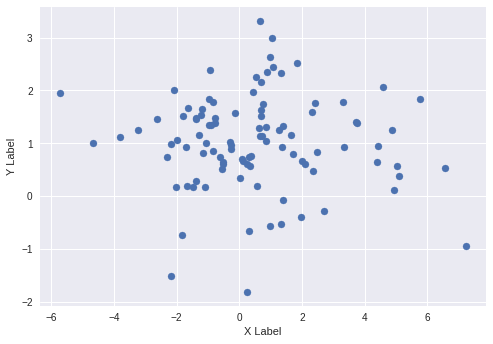

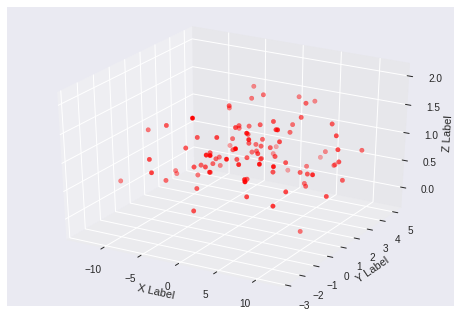

In [0]:
# Use function *GSAMPLE()* defined above
# to generate the data
G_1 = GSAMPLE([1,1], [[2, 1], [1, 2]], 100)
G_2 = GSAMPLE([1,1,1], [[5,2,0], [2,3,1], [0,1,1]], 100)

# Check the dimension
print(G_1.shape)
print(G_2.shape)

# Import package
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Let us plot the data: G_1
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = G_1
x = data[:,0]
y = data[:,1]
ax.scatter(x, y)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.show()

# Let us plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = G_2[:,0]
y = G_2[:,1]
z = G_2[:,2]
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Plot
plt.show()


# PROBLEM 3 (SAMPLE SIZE)

The problem visualizes the effects of small sample size. Draw a number $n$ of sample points from a one-dimensional Gaussian, sort them into a histogram. 

## (a) Produce four histograms with $n = 100$ and $N_{bins} = 10$. Plot histograms using the *plt.hist* function.

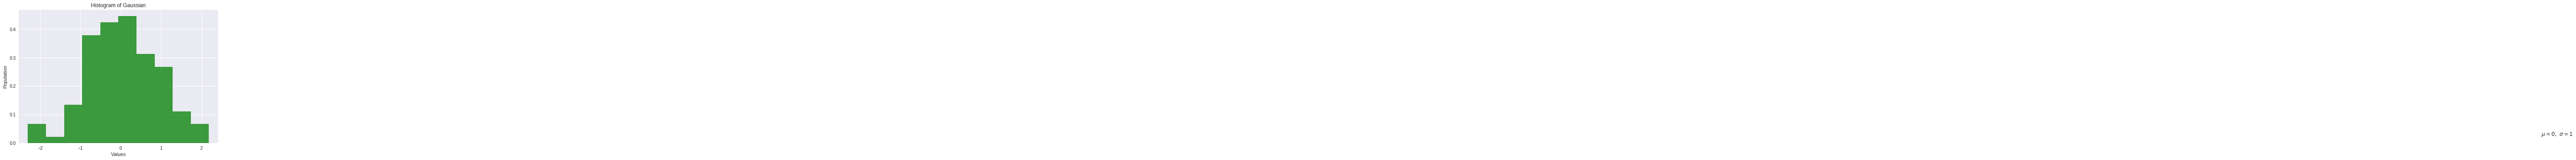

In [0]:
# Import package
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(1)
mu, sigma, n = 0, 1, 100
x = mu + sigma * np.random.randn(n)

# the histogram of the data
n, bins, patches = plt.hist(x, 10, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Values')
plt.ylabel('Population')
plt.title('Histogram of Gaussian')
plt.text(60, .025, r'$\mu=0,\ \sigma=1$')
plt.grid(True)

plt.show()

## (b) Repeat procedure with $n = 100000$

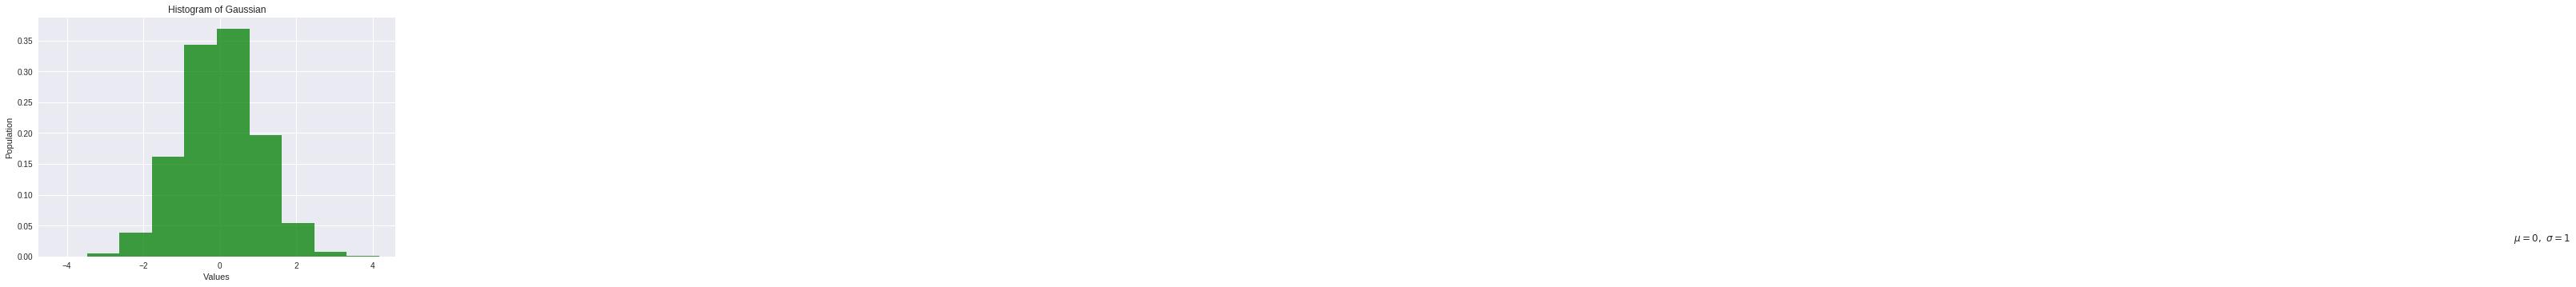

In [0]:
# Fixing random state for reproducibility
np.random.seed(1)
mu, sigma, n = 0, 1, 100000
x = mu + sigma * np.random.randn(n)

# Plot the histogram
n, bins, patches = plt.hist(x, 10, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Values')
plt.ylabel('Population')
plt.title('Histogram of Gaussian')
plt.text(60, .025, r'$\mu=0,\ \sigma=1$')
plt.grid(True)

plt.show()

## (c) For $n = 100000$, plot one histogram each for $N_\text{bins} \in \{10, 100, 1000\}$.

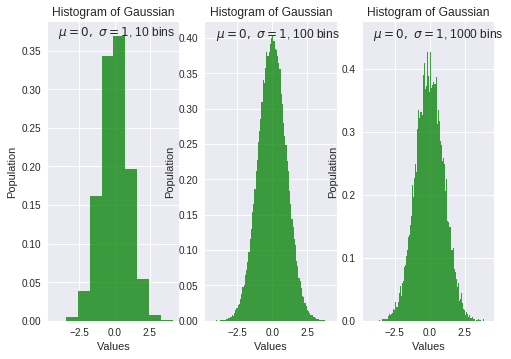

In [0]:
# Fixing random state for reproducibility
np.random.seed(1)
mu, sigma, n = 0, 1, 100000
x = mu + sigma * np.random.randn(n)

# Subplot
fig, ax = plt.subplots(nrows=1, ncols=3)

# Plot the histogram
plt.subplot(131)
n, bins, patches = plt.hist(x, 10, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Values')
plt.ylabel('Population')
plt.title('Histogram of Gaussian')
plt.text(-4, .37, r'$\mu=0,\ \sigma=1$, 10 bins')
plt.grid(True)

# Plot the histogram
plt.subplot(132)
n, bins, patches = plt.hist(x, 100, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Values')
plt.ylabel('Population')
plt.title('Histogram of Gaussian')
plt.text(-4, .4, r'$\mu=0,\ \sigma=1$, 100 bins')
plt.grid(True)

# Plot the histogram
plt.subplot(133)
n, bins, patches = plt.hist(x, 1000, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Values')
plt.ylabel('Population')
plt.title('Histogram of Gaussian')
plt.text(-4, .45, r'$\mu=0,\ \sigma=1$, 1000 bins')
plt.grid(True)

plt.show()

## (d) Finally, choose $n = 100$ and $N_\text{bins} = 1000$.

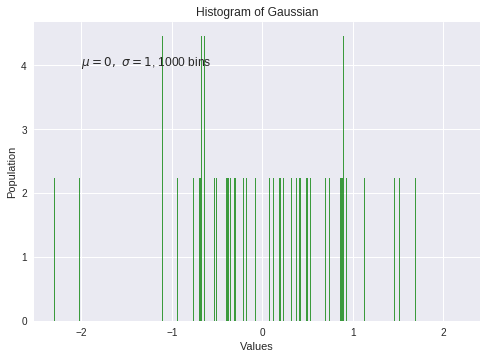

In [0]:
# Fixing random state for reproducibility
np.random.seed(1)
mu, sigma, n = 0, 1, 100
x = mu + sigma * np.random.randn(n)

# Plot the histogram
n, bins, patches = plt.hist(x, 1000, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Values')
plt.ylabel('Population')
plt.title('Histogram of Gaussian')
plt.text(-2, 4, r'$\mu=0,\ \sigma=1$, 1000 bins')
plt.grid(True)

plt.show()

## (e) Brief Discussion

The empirical results above presents evidence that randomly draw values from normal distribution converges to Gaussian asymptotically. In other words, as sample size $n$ increases to a sufficiently large value, we would observe bell-shape curve, i.e. a normal distribution. 